In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data'
data = pd.read_csv(url, header=None, na_values='?')

In [56]:
data.shape

(690, 16)

In [57]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [58]:
data.columns = ['A' + str(i) for i in range (1,16)] + ['class'] #переименование с 1 по 15 и 16-го столбцов
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [59]:
data.describe() #выводит информацию про числовые столбцы

,A2,A3,A8,A11,A14,A15
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [60]:
data.describe(include=[object]) #выводим информацию про нечисловые столбцы; top - какое значение встречается чаще всего; 
# freq - сколько раз встретилось самое частое значение

,A1,A4,A5,A6,A7,A9,A10,A12,A13,class
count,678,684,684,681,681,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,468,519,519,137,399,361,395,374,625,383


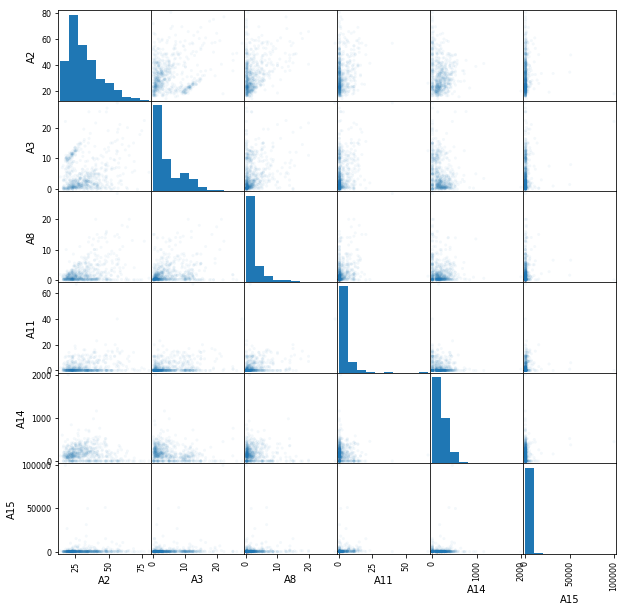

In [61]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha=0.05, figsize=(10, 10));

In [62]:
data.corr() # выводим корреляционную матрицу; если коэффициент близок к 1 или -1, то между признаками сильная корреляция

,A2,A3,A8,A11,A14,A15
A2,1.000000,0.202317,0.395751,0.185912,-0.079812,0.018553
A3,0.202317,1.000000,0.298902,0.271207,-0.224242,0.123121
A8,0.395751,0.298902,1.000000,0.322330,-0.077163,0.051345
A11,0.185912,0.271207,0.322330,1.000000,-0.120096,0.063692
A14,-0.079812,-0.224242,-0.077163,-0.120096,1.000000,0.066853
A15,0.018553,0.123121,0.051345,0.063692,0.066853,1.000000


In [63]:
data = data.fillna(data.median(axis=0),axis=0) # дозаполняем числовые столбцы медианными значениями

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
A1       678 non-null object
A2       690 non-null float64
A3       690 non-null float64
A4       684 non-null object
A5       684 non-null object
A6       681 non-null object
A7       681 non-null object
A8       690 non-null float64
A9       690 non-null object
A10      690 non-null object
A11      690 non-null int64
A12      690 non-null object
A13      690 non-null object
A14      690 non-null float64
A15      690 non-null int64
class    690 non-null object
dtypes: float64(4), int64(2), object(10)
memory usage: 86.3+ KB


In [65]:
data['A1'] = data['A1'].fillna('b')
data['A4'] = data['A4'].fillna('u')
data['A5'] = data['A5'].fillna('g')
data['A6'] = data['A6'].fillna('c')
data['A7'] = data['A7'].fillna('v')

In [66]:
data.describe(include=[object])

,A1,A4,A5,A6,A7,A9,A10,A12,A13,class
count,690,690,690,690,690,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,480,525,525,146,408,361,395,374,625,383


In [67]:
#переводим объектные (текстовые) переменные в числовой формат с помощью one-hot кодирования
data = pd.concat([data, 
                    pd.get_dummies(data['A4'], prefix="A4"),
                    pd.get_dummies(data['A5'], prefix="A5"),
                    pd.get_dummies(data['A6'], prefix="A6"),
                    pd.get_dummies(data['A7'], prefix="A7"),
                    pd.get_dummies(data['A13'], prefix="A13"),],
                     axis=1)
data.drop(['A4','A5','A6','A7','A13'], axis=1, inplace=True)

In [68]:
#кодируем поля обычным способом (0 и 1)
data['A1'] = pd.factorize(data['A1'])[0]
data['A9'] = pd.factorize(data['A9'])[0]
data['A10'] = pd.factorize(data['A10'])[0]
data['A12'] = pd.factorize(data['A12'])[0]
data['class'] = pd.factorize(data['class'])[0]

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 43 columns):
A1       690 non-null int64
A2       690 non-null float64
A3       690 non-null float64
A8       690 non-null float64
A9       690 non-null int64
A10      690 non-null int64
A11      690 non-null int64
A12      690 non-null int64
A14      690 non-null float64
A15      690 non-null int64
class    690 non-null int64
A4_l     690 non-null uint8
A4_u     690 non-null uint8
A4_y     690 non-null uint8
A5_g     690 non-null uint8
A5_gg    690 non-null uint8
A5_p     690 non-null uint8
A6_aa    690 non-null uint8
A6_c     690 non-null uint8
A6_cc    690 non-null uint8
A6_d     690 non-null uint8
A6_e     690 non-null uint8
A6_ff    690 non-null uint8
A6_i     690 non-null uint8
A6_j     690 non-null uint8
A6_k     690 non-null uint8
A6_m     690 non-null uint8
A6_q     690 non-null uint8
A6_r     690 non-null uint8
A6_w     690 non-null uint8
A6_x     690 non-null uint8
A7_bb    690 non-nu

In [83]:
data.head()

,A1,A2,A3,A8,A9,A10,A11,A12,A14,A15,...,A7_ff,A7_h,A7_j,A7_n,A7_o,A7_v,A7_z,A13_g,A13_p,A13_s
0,0,30.83,0.000,1.25,0,0,1,0,202.0,0,...,0,0,0,0,0,1,0,1,0,0
1,1,58.67,4.460,3.04,0,0,6,0,43.0,560,...,0,1,0,0,0,0,0,1,0,0
2,1,24.50,0.500,1.50,0,1,0,0,280.0,824,...,0,1,0,0,0,0,0,1,0,0
3,0,27.83,1.540,3.75,0,0,5,1,100.0,3,...,0,0,0,0,0,1,0,1,0,0
4,0,20.17,5.625,1.71,0,1,0,0,120.0,0,...,0,0,0,0,0,1,0,0,0,1


In [70]:
#указываем входы и выходы модели
X = data.drop(('class'), axis=1)
y = data['class']

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [72]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [73]:
clf.score(X_train, y_train)

0.8768115942028986

In [74]:
clf.intercept_, clf.coef_

(array([-0.48991008]),
 array([[ 2.52555157e-02, -8.56945832e-03, -9.17085882e-03,
         -5.93015031e-02,  2.97240010e+00,  7.51201181e-01,
         -1.06462761e-01,  2.97816049e-01,  1.33008544e-03,
         -3.73384066e-04,  0.00000000e+00, -3.96083950e-01,
         -9.38261277e-02, -3.96083950e-01,  0.00000000e+00,
         -9.38261277e-02,  2.76092938e-01, -2.21031126e-01,
         -7.49464748e-01,  3.81448302e-01, -3.06162172e-01,
          7.05995498e-01,  4.36232395e-01,  3.36564190e-01,
          7.24536497e-01,  7.23677324e-02, -2.87633424e-01,
         -5.21856950e-02, -2.80664188e-01, -1.52600628e+00,
         -8.82673392e-02, -5.64227860e-02,  7.33842762e-01,
         -4.22104589e-01, -3.66625724e-01, -7.32623926e-01,
          3.85794381e-02, -1.06667710e-01,  5.10379796e-01,
          5.45675663e-01, -1.29726556e+00,  2.61679822e-01]]))

In [75]:
clf.predict(X_test[-1:])

array([0], dtype=int64)

In [76]:
#подключаем roc-кривую
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge

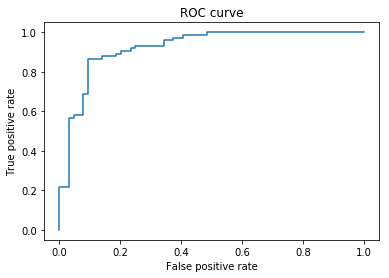

In [77]:
y_pred = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [78]:
roc_auc_score(y_test, y_pred)

0.9233530405405406

In [85]:
#проверяем, нельзя ли улучшить линейную регрессию, добавив полиномиальные признаки
pf = PolynomialFeatures(degree=1)
X_train_polynomial = pf.fit_transform(X_train)
X_test_polynomial = pf.fit_transform(X_test)
lf = LogisticRegression()
lf.fit(X_train_polynomial, y_train)
lf.score(X_train_polynomial, y_train) #смотрим R^2 на обучающей выборке

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.875

In [86]:
lf.score(X_test_polynomial, y_test)

0.8333333333333334

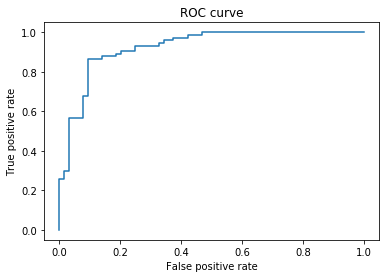

In [87]:
y_pred = lf.predict_proba(X_test_polynomial)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()